In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,BatchNormalization, GlobalAveragePooling2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from Evaluation_matrices import f1
import keras
from keras import layers , metrics 
from tensorflow.keras import layers, models
from keras.models import Model, load_model
from keras.callbacks import  ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2
from Evaluation_matrices import f1
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, SGD


In [2]:
data_dir = r'D:\NU\codealpha\new1'

In [3]:
# Initialize empty lists to store images and labels
images = []
labels = []

# Loop through each subfolder (class) in the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    # Ensure it's a directory
    if os.path.isdir(class_dir):
        # Loop through each image file in the subfolder
        for img_file in os.listdir(class_dir):
            # Read the image
            img_path = os.path.join(class_dir, img_file)
            # Check if image file exists
            if os.path.isfile(img_path):
                img = cv2.imread(img_path)
                # Check if image is loaded successfully
                if img is not None:
                    # Resize the image if necessary
                    img = cv2.resize(img, (224, 224))  # Adjust size as needed
                    # Append the image and corresponding label
                    images.append(img)
                    labels.append(class_name)
                else:
                    print(f"Error: Unable to load image '{img_path}'")
            else:
                print(f"Error: File '{img_path}' does not exist")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [4]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)
print(X_test.shape)
num_classes =y_train.shape[0]
print(num_classes)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
print(len(y_train_encoded))

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(np.unique(labels)), activation='softmax'))


In [6]:
checkpoint = callbacks.ModelCheckpoint(r'D:\NU\codealpha\model\model', verbose=1, monitor='val_loss', save_best_only=True)

checkpoint1 = callbacks.ModelCheckpoint(r'D:\NU\codealpha\model\trained_model.h5',save_best_only=True, save_weights_only=True, verbose=1)

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-10, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint1, checkpoint, reduce_lr,early_stop]




In [ ]:

opt_adam = tf.keras.optimizers.experimental.Adam(1e-3)
# Define RMSprop optimizer
#opt_rmsprop = RMSprop(learning_rate=1e-3)

# Define SGD optimizer with momentum
#opt_sgd = SGD(learning_rate=1e-3, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              
              optimizer=opt_adam,
              metrics=['acc'])

model.summary()

In [8]:
history = model.fit(train_generator, validation_data=validation_generator ,
          steps_per_epoch=40,
          epochs=120,
          shuffle=True, callbacks=callbacks)



Epoch 1/120
40/40 [==============================] - ETA: 0s - loss: 3.6495 - acc: 0.2664
Epoch 1: val_loss improved from inf to 1.38301, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 1: val_loss improved from inf to 1.38301, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 30s 647ms/step - loss: 3.6495 - acc: 0.2664 - val_loss: 1.3830 - val_acc: 0.6250 - lr: 0.0010
Epoch 2/120
40/40 [==============================] - ETA: 0s - loss: 1.5573 - acc: 0.5453
Epoch 2: val_loss improved from 1.38301 to 0.83767, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 2: val_loss improved from 1.38301 to 0.83767, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 578ms/step - loss: 1.5573 - acc: 0.5453 - val_loss: 0.8377 - val_acc: 0.7800 - lr: 0.0010
Epoch 3/120
40/40 [==============================] - ETA: 0s - loss: 1.1495 - acc: 0.6561
Epoch 3: val_loss improved from 0.83767 to 0.57523, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 3: val_loss improved from 0.83767 to 0.57523, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 575ms/step - loss: 1.1495 - acc: 0.6561 - val_loss: 0.5752 - val_acc: 0.8350 - lr: 0.0010
Epoch 4/120
40/40 [==============================] - ETA: 0s - loss: 0.9796 - acc: 0.6847
Epoch 4: val_loss improved from 0.57523 to 0.53581, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 4: val_loss improved from 0.57523 to 0.53581, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 22s 551ms/step - loss: 0.9796 - acc: 0.6847 - val_loss: 0.5358 - val_acc: 0.8450 - lr: 0.0010
Epoch 5/120
40/40 [==============================] - ETA: 0s - loss: 0.8118 - acc: 0.7596
Epoch 5: val_loss improved from 0.53581 to 0.37245, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 5: val_loss improved from 0.53581 to 0.37245, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 25s 610ms/step - loss: 0.8118 - acc: 0.7596 - val_loss: 0.3725 - val_acc: 0.9000 - lr: 0.0010
Epoch 6/120
40/40 [==============================] - ETA: 0s - loss: 0.7958 - acc: 0.7596
Epoch 6: val_loss improved from 0.37245 to 0.35667, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 6: val_loss improved from 0.37245 to 0.35667, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 562ms/step - loss: 0.7958 - acc: 0.7596 - val_loss: 0.3567 - val_acc: 0.9250 - lr: 0.0010
Epoch 7/120
40/40 [==============================] - ETA: 0s - loss: 0.6259 - acc: 0.8193
Epoch 7: val_loss improved from 0.35667 to 0.29083, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 7: val_loss improved from 0.35667 to 0.29083, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 24s 597ms/step - loss: 0.6259 - acc: 0.8193 - val_loss: 0.2908 - val_acc: 0.9250 - lr: 0.0010
Epoch 8/120
40/40 [==============================] - ETA: 0s - loss: 0.6071 - acc: 0.8081
Epoch 8: val_loss improved from 0.29083 to 0.28863, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 8: val_loss improved from 0.29083 to 0.28863, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 583ms/step - loss: 0.6071 - acc: 0.8081 - val_loss: 0.2886 - val_acc: 0.9050 - lr: 0.0010
Epoch 9/120
40/40 [==============================] - ETA: 0s - loss: 0.5479 - acc: 0.8328
Epoch 9: val_loss improved from 0.28863 to 0.21419, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 9: val_loss improved from 0.28863 to 0.21419, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 570ms/step - loss: 0.5479 - acc: 0.8328 - val_loss: 0.2142 - val_acc: 0.9450 - lr: 0.0010
Epoch 10/120
40/40 [==============================] - ETA: 0s - loss: 0.4934 - acc: 0.8516
Epoch 10: val_loss did not improve from 0.21419

Epoch 10: val_loss did not improve from 0.21419
40/40 [==============================] - 15s 379ms/step - loss: 0.4934 - acc: 0.8516 - val_loss: 0.2237 - val_acc: 0.9550 - lr: 0.0010
Epoch 11/120
40/40 [==============================] - ETA: 0s - loss: 0.4459 - acc: 0.8539
Epoch 11: val_loss improved from 0.21419 to 0.17698, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 11: val_loss improved from 0.21419 to 0.17698, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 572ms/step - loss: 0.4459 - acc: 0.8539 - val_loss: 0.1770 - val_acc: 0.9700 - lr: 0.0010
Epoch 12/120
40/40 [==============================] - ETA: 0s - loss: 0.4147 - acc: 0.8789
Epoch 12: val_loss did not improve from 0.17698

Epoch 12: val_loss did not improve from 0.17698
40/40 [==============================] - 16s 385ms/step - loss: 0.4147 - acc: 0.8789 - val_loss: 0.2213 - val_acc: 0.9500 - lr: 0.0010
Epoch 13/120
40/40 [==============================] - ETA: 0s - loss: 0.4265 - acc: 0.8547
Epoch 13: val_loss improved from 0.17698 to 0.16625, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 13: val_loss improved from 0.17698 to 0.16625, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 569ms/step - loss: 0.4265 - acc: 0.8547 - val_loss: 0.1662 - val_acc: 0.9650 - lr: 0.0010
Epoch 14/120
40/40 [==============================] - ETA: 0s - loss: 0.3802 - acc: 0.8798
Epoch 14: val_loss improved from 0.16625 to 0.13041, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoch 14: val_loss improved from 0.16625 to 0.13041, saving model to D:\NU\Nour_project\model\model


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 568ms/step - loss: 0.3802 - acc: 0.8798 - val_loss: 0.1304 - val_acc: 0.9750 - lr: 0.0010
Epoch 15/120
40/40 [==============================] - ETA: 0s - loss: 0.3582 - acc: 0.8798
Epoch 15: val_loss did not improve from 0.13041

Epoch 15: val_loss did not improve from 0.13041
40/40 [==============================] - 15s 373ms/step - loss: 0.3582 - acc: 0.8798 - val_loss: 0.1623 - val_acc: 0.9600 - lr: 0.0010
Epoch 16/120
40/40 [==============================] - ETA: 0s - loss: 0.3783 - acc: 0.8798
Epoch 16: val_loss did not improve from 0.13041

Epoch 16: val_loss did not improve from 0.13041
40/40 [==============================] - 15s 379ms/step - loss: 0.3783 - acc: 0.8798 - val_loss: 0.2118 - val_acc: 0.9350 - lr: 0.0010
Epoch 17/120
40/40 [==============================] - ETA: 0s - loss: 0.3611 - acc: 0.8909
Epoch 17: val_loss did not improve from 0.13041

Epoch 17: val_loss did not improve from 0.13041

Epoch 17: ReduceLROnPlateau re

INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 574ms/step - loss: 0.2156 - acc: 0.9419 - val_loss: 0.1224 - val_acc: 0.9700 - lr: 1.0000e-04
Epoch 21/120
40/40 [==============================] - ETA: 0s - loss: 0.2387 - acc: 0.9250
Epoch 21: val_loss did not improve from 0.12235

Epoch 21: val_loss did not improve from 0.12235
40/40 [==============================] - 16s 379ms/step - loss: 0.2387 - acc: 0.9250 - val_loss: 0.1337 - val_acc: 0.9700 - lr: 1.0000e-04
Epoch 22/120
40/40 [==============================] - ETA: 0s - loss: 0.2297 - acc: 0.9289
Epoch 22: val_loss did not improve from 0.12235

Epoch 22: val_loss did not improve from 0.12235
40/40 [==============================] - 16s 387ms/step - loss: 0.2297 - acc: 0.9289 - val_loss: 0.1280 - val_acc: 0.9650 - lr: 1.0000e-04
Epoch 23/120
40/40 [==============================] - ETA: 0s - loss: 0.2156 - acc: 0.9339
Epoch 23: val_loss improved from 0.12235 to 0.11806, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoc

INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 23s 569ms/step - loss: 0.2156 - acc: 0.9339 - val_loss: 0.1181 - val_acc: 0.9750 - lr: 1.0000e-04
Epoch 24/120
40/40 [==============================] - ETA: 0s - loss: 0.2122 - acc: 0.9371
Epoch 24: val_loss did not improve from 0.11806

Epoch 24: val_loss did not improve from 0.11806
40/40 [==============================] - 16s 379ms/step - loss: 0.2122 - acc: 0.9371 - val_loss: 0.1245 - val_acc: 0.9750 - lr: 1.0000e-04
Epoch 25/120
40/40 [==============================] - ETA: 0s - loss: 0.2051 - acc: 0.9379
Epoch 25: val_loss did not improve from 0.11806

Epoch 25: val_loss did not improve from 0.11806
40/40 [==============================] - 16s 386ms/step - loss: 0.2051 - acc: 0.9379 - val_loss: 0.1200 - val_acc: 0.9800 - lr: 1.0000e-04
Epoch 26/120
40/40 [==============================] - ETA: 0s - loss: 0.1972 - acc: 0.9403
Epoch 26: val_loss improved from 0.11806 to 0.10527, saving model to D:\NU\Nour_project\model\trained_model.h5

Epoc

INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


INFO:tensorflow:Assets written to: D:\NU\Nour_project\model\model\assets


40/40 [==============================] - 22s 559ms/step - loss: 0.1972 - acc: 0.9403 - val_loss: 0.1053 - val_acc: 0.9850 - lr: 1.0000e-04
Epoch 27/120
40/40 [==============================] - ETA: 0s - loss: 0.1755 - acc: 0.9508
Epoch 27: val_loss did not improve from 0.10527

Epoch 27: val_loss did not improve from 0.10527
40/40 [==============================] - 16s 379ms/step - loss: 0.1755 - acc: 0.9508 - val_loss: 0.1178 - val_acc: 0.9800 - lr: 1.0000e-04
Epoch 28/120
40/40 [==============================] - ETA: 0s - loss: 0.1872 - acc: 0.9411
Epoch 28: val_loss did not improve from 0.10527

Epoch 28: val_loss did not improve from 0.10527
40/40 [==============================] - 15s 381ms/step - loss: 0.1872 - acc: 0.9411 - val_loss: 0.1088 - val_acc: 0.9800 - lr: 1.0000e-04
Epoch 29/120
40/40 [==============================] - ETA: 0s - loss: 0.1835 - acc: 0.9395
Epoch 29: val_loss did not improve from 0.10527

Epoch 29: val_loss did not improve from 0.10527

Epoch 29: ReduceLR

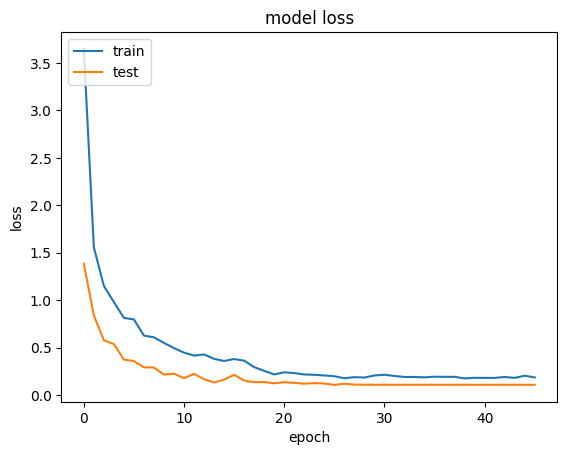

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

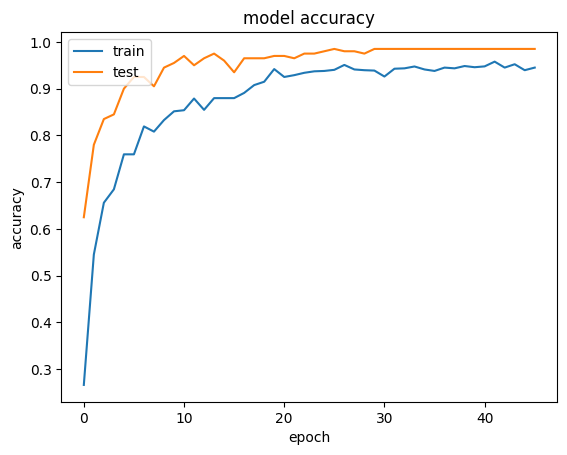

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Load your trained model
model = load_model(r'D:\NU\codealpha\model\model')

# Initialize the video capture object
cap = cv2.VideoCapture(r'D:\NU\codealpha\mohamed.mp4')
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the captured frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face_region = gray[y:y+h, x:x+w]

        # Preprocess the face region (resize, reshape, etc.) to match your model's input
        face_region_preprocessed = downsample_image(face_region)
        face_region_preprocessed = np.stack((face_region_preprocessed,)*3, axis=-1)  # Convert to 3 channels
        face_region_preprocessed = face_region_preprocessed.reshape(1, 224, 224, 3) / 255.0  # Add batch dimension and normalize

        # Predict the identity using your model
        predictions = model.predict(face_region_preprocessed)
        predicted_id  = np.argmax(predictions)
        predicted_identity = reverse_class_id_map[predicted_id] if predicted_id in reverse_class_id_map else "Unknown"

        # Display the predicted identity and ID on the frame
        display_text = f"ID: {predicted_id}, Name: {predicted_identity}"
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, display_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Frame', frame)

    # Break the loop with the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 30ms/step
